<a href="https://colab.research.google.com/github/mahsoosalimi/100DaysOfCV/blob/main/D03_Masking_Threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Masking with color or binary thresholds**
A mask is a matrix of zero and non-zero values used for a bitwise operation. Masks can be used to cut, or mask, out certain sections of an image. A mask is typically a matrix of zeros (for the parts to omit) and non-zeros (for the parts we want to keep).


In [339]:
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from google.colab import drive

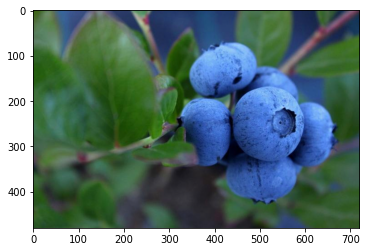

In [341]:
img = cv2.imread('./Blueberry1.jpeg')

# cvtColor(image, flag)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))

In [342]:
dark_blue = np.array([100, 50, 25])  #175, 130, 120
light_blue = np.array([140, 210, 210]) #200, 190, 220

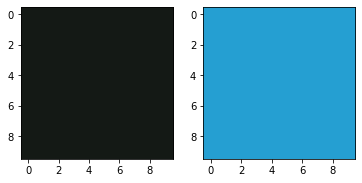

In [343]:
from matplotlib.colors import hsv_to_rgb
from matplotlib import cm

lo_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [355]:
mask = cv2.inRange(img_hsv, light_violet, dark_violet)
res = cv2.bitwise_and(img, img, mask=mask)

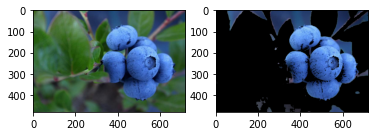

In [357]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.imshow(res)

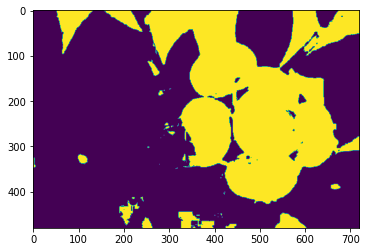

In [391]:
# threshold for hue channel in blue range
blue_min = np.array([100, 50, 50], np.uint8)
blue_max = np.array([200, 255, 255], np.uint8)

# show threshold bits
threshold_blue_img = cv2.inRange(img_hsv, blue_min, blue_max)
plt.imshow(threshold_blue_img)

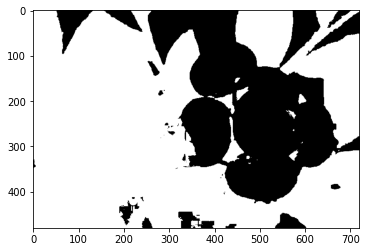

In [389]:
# Using binary thresholding to obtain an image mask¶
mask_inverse = cv2.inRange(img_hsv, blue_min, blue_max)
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))